In [134]:
import pandas as pd
from scipy.io import arff
import os,sys

sys.path.append(os.path.abspath('../src'))
from src.data.load_data import load_arff_data

file_path = 'data\Supply Chain Management_train.arff'
df = load_arff_data(file_path)
target_features = [col for col in df.columns if col.startswith("MTLp") or col == "LBL"]
non_target_features = [col for col in df.columns if not (col.startswith("MTLp") or col == "LBL")]
print(f"total features = {len(non_target_features)}")
print(f"total target features = {len(target_features)}")
print(f"total rows = {len(df)}")
df.head()

total features = 280
total target features = 16
total rows = 8145


,timeunit,storageCost,interestRate,compidx0lt2,compidx0lt2l1,compidx0lt2l2,compidx0lt2l4,compidx0lt2l8,compidx1lt2,compidx2lt2,...,MTLp7,MTLp8,MTLp9,MTLp10,MTLp11,MTLp12,MTLp13,MTLp14,MTLp15,MTLp16
0,9.0,27.0,8.0,881.606,882.253,826.727,810.837,848.833,1468.412,815.832,...,2292.0,2181.0,1619.0,1849.0,1707.0,1932.0,2052.0,2409.0,2279.0,2138.0
1,10.0,27.0,8.0,869.455,881.606,882.253,802.480,770.544,1407.148,828.687,...,2276.0,2231.0,1649.0,1813.0,1696.0,1988.0,2140.0,2366.0,2307.0,2154.0
2,11.0,27.0,8.0,850.916,869.455,881.606,826.727,784.625,1424.312,837.975,...,2264.0,2203.0,1651.0,1739.0,1677.0,1991.0,2087.0,2295.0,2185.0,2131.0
3,12.0,27.0,8.0,862.066,850.916,869.455,882.253,792.403,1411.209,803.296,...,2279.0,2203.0,1627.0,1747.0,1669.0,1885.0,2072.0,2292.0,2187.0,2170.0
4,13.0,27.0,8.0,842.781,862.066,850.916,881.606,810.837,1428.685,813.118,...,2241.0,2198.0,1626.0,1740.0,1663.0,1874.0,2074.0,2257.0,2136.0,2164.0


In [127]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print(f"Missing value in data = {missing_values.sum()}")

Missing value in data = 0


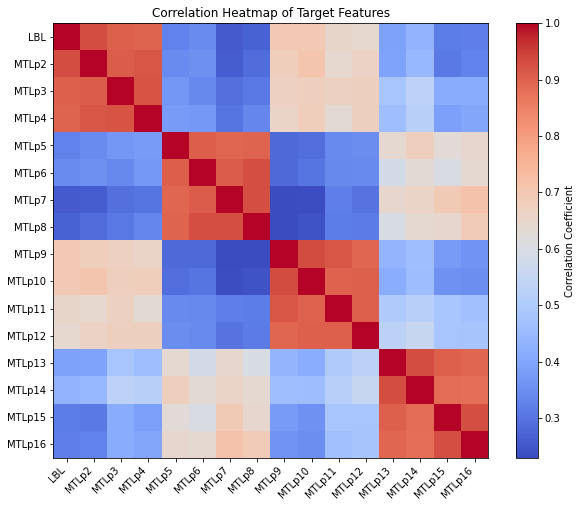

In [73]:
target_correlation_matrix = df[target_features].corr()

plt.figure(figsize=(10, 8))
plt.imshow(target_correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation Coefficient")
plt.xticks(range(len(target_features)), target_features, rotation=45, ha="right")
plt.yticks(range(len(target_features)), target_features)
plt.title("Correlation Heatmap of Target Features")
plt.show()

In [75]:
outlier_summary = df[target_features].apply(
    lambda x: ((x < x.quantile(0.01)) | (x > x.quantile(0.99))).sum()
)
outlier_summary

LBL       34
MTLp2     33
MTLp3     34
MTLp4     33
MTLp5     33
MTLp6     34
MTLp7     27
MTLp8     34
MTLp9     33
MTLp10    34
MTLp11    33
MTLp12    34
MTLp13    34
MTLp14    34
MTLp15    34
MTLp16    34
dtype: int64